Lucas Derveaux, Tibo Vandercruyssen and Bavo Persyn



# Division of labor ##

We did this entire project once again together with pair programming.
We got together (virtualy or in real life) and worked together, looking for solutions. Everyone did about a third of the work.


# Data preprocessing

Import the right libraries

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn

import warnings
warnings.filterwarnings('ignore')

import timeit
import tensorflow as tf
import tensorflow.keras as keras
from keras.datasets import cifar10,cifar100
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
 
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

from keras.applications.vgg16 import VGG16 
from keras.models import Model

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import os
import pickle


Clone GitHub repository, so we can use the given images

In [2]:
!git clone https://github.com/tibovdc/ProjectML.git

Cloning into 'ProjectML'...
remote: Enumerating objects: 10784, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 10784 (delta 12), reused 27 (delta 4), pack-reused 10749
Receiving objects: 100% (10784/10784), 410.18 MiB | 22.63 MiB/s, done.
Resolving deltas: 100% (89/89), done.
Checking out files: 100% (10259/10259), done.


Show 1 image from GitHub to test if we can view them all.

In [3]:
 !pip install -q mediapy


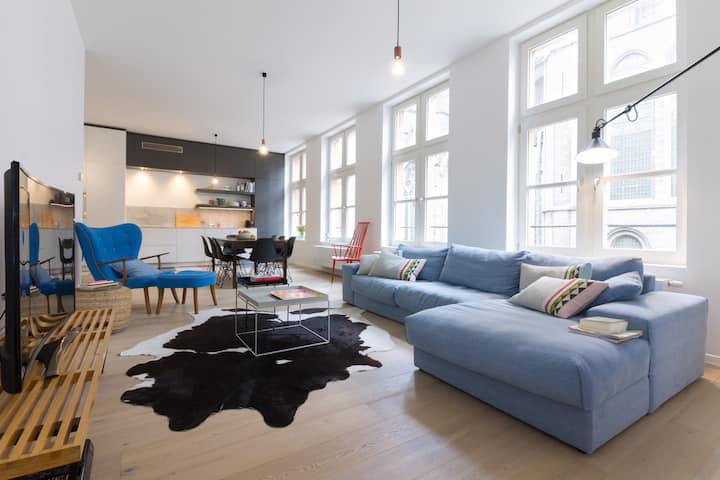

In [4]:
import mediapy as media

DATA_DIR = 'ProjectML/images/10015215/'  # Or any local path.
IMAGE = DATA_DIR + '0.jpg'

image2 = media.read_image(IMAGE)
media.show_image(image2, title='10015215 - image0')

Install os-sys to be able to view all the images in their folders.

In [19]:
!pip install os-sys


     |████████████████████████████████| 15.6 MB 5.1 MB/s 
     |████████████████████████████████| 958 kB 46.3 MB/s 
     |████████████████████████████████| 65 kB 2.1 MB/s 
     |████████████████████████████████| 79.6 MB 1.1 MB/s 
     |████████████████████████████████| 225 kB 23.0 MB/s 
     |████████████████████████████████| 15.5 MB 29.5 MB/s 
     |████████████████████████████████| 15.4 MB 35.1 MB/s 
     |████████████████████████████████| 15.4 MB 224 kB/s 
     |████████████████████████████████| 15.9 MB 27.7 MB/s 
     |████████████████████████████████| 15.4 MB 41.4 MB/s 
     |████████████████████████████████| 15.4 MB 18 kB/s 
     |████████████████████████████████| 14.2 MB 48.5 MB/s 
     |████████████████████████████████| 14.2 MB 52.2 MB/s 
     |████████████████████████████████| 12.2 MB 43.8 MB/s 
     |████████████████████████████████| 50.9 MB 6.2 kB/s 
     |████████████████████████████████| 30.8 MB 167 kB/s 
     |████████████████████████████████| 51.8 MB 119 kB/s 
     |████

# Title pending

In the cell below we load every image in a dictionary with the listing-Id as key.

In [72]:
from PIL import Image
from numpy import asarray 

dictio = {}
import os
rootdir = 'ProjectML/images'

teller=0

for subdir, dirs, files in os.walk(rootdir):
  dictio[subdir[17:]] = []
  for file in files:
    image = Image.open(os.path.join(subdir, file))
    data = asarray(image)
    dictio[subdir[17:]].append(data)
  teller = teller+1
  if teller > 200:
    break
    
dictio.pop('')




[]

Split the data between train and test sets with cifar100, which 100 classes containing 600 images each. ref:https://www.cs.toronto.edu/~kriz/cifar.html?fbclid=IwAR1DWMk7l-OzES8DZVdv-_mnHA-c-rnwboLGaGa21tqEQQ1bQSt2CMR0XNU


In [21]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

Using pickele to be able to see all the fine and coarse labels that cifar100 has to offer.

In [22]:
def unpickle(file):
    with open(file, 'rb') as fo:
        myDict = pickle.load(fo, encoding='latin1')
    return myDict

In [23]:
metaData = unpickle('ProjectML/meta')

print("Fine labels:", metaData['fine_label_names'], "\n")
print("Coarse labels:", metaData['coarse_label_names'])

Fine labels: ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', '

In [24]:

print('x_train shape:', x_train.shape)#data
print('y_train shape:', y_train.shape)#label
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

print(y_test)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
[[49]
 [33]
 [72]
 ...
 [51]
 [42]
 [70]]


Normalize the data

In [25]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Define number of class and categorical to class.

In [26]:
num_classes = 100
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
batch_size = 128

build model function

In [27]:
def build_model():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), padding="same", activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(100, activation='softmax'))
  return model

In [28]:
input_shape = x_train[0].shape

with tf.device('/gpu:0'):
    model = build_model()
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=SGD(lr=0.01), metrics=['accuracy'])

    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=2,
              verbose=1,
              validation_data=(x_test, y_test))

    score = model.evaluate(x_test, y_test, verbose=0)
    print(score)

Epoch 1/2
391/391 [==============================] - 129s 326ms/step - loss: 4.6036 - accuracy: 0.0120 - val_loss: 4.5994 - val_accuracy: 0.0148
Epoch 2/2
391/391 [==============================] - 110s 281ms/step - loss: 4.5963 - accuracy: 0.0177 - val_loss: 4.5919 - val_accuracy: 0.0224
[4.591894149780273, 0.02239999920129776]


In the cell below we use a random listings images to test our trained model. In the results we found that our model tries to find a single object. Our images contain multiple objects which is why our model doesn't predict it accurately.

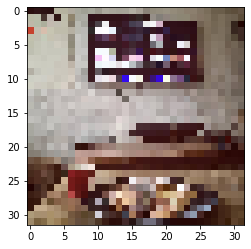

Predicted Result: 24
cockroach


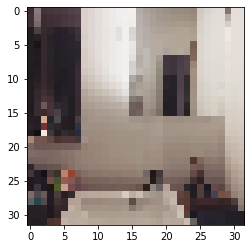

Predicted Result: 41
lawn_mower


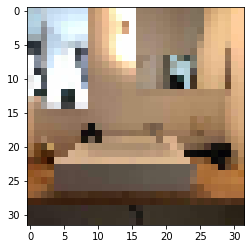

Predicted Result: 0
apple


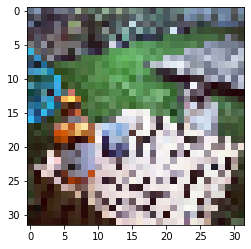

Predicted Result: 51
mushroom


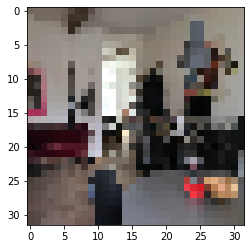

Predicted Result: 28
cup


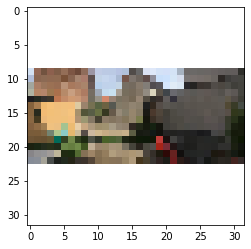

Predicted Result: 56
palm_tree


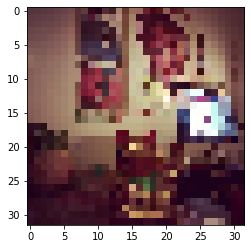

Predicted Result: 53
orange


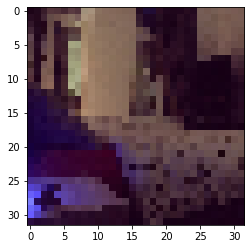

Predicted Result: 41
lawn_mower


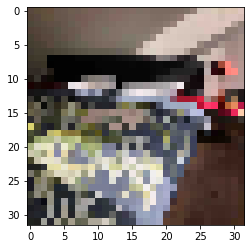

Predicted Result: 51
mushroom


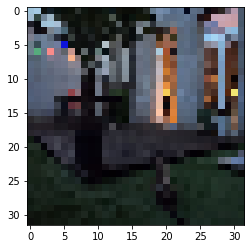

Predicted Result: 20
chair


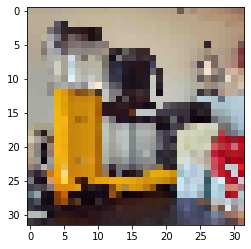

Predicted Result: 41
lawn_mower


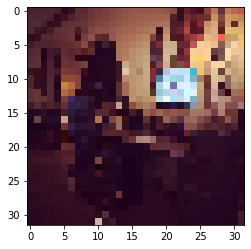

Predicted Result: 20
chair


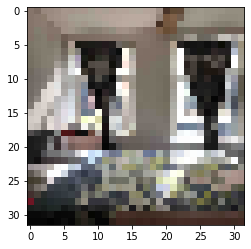

Predicted Result: 24
cockroach


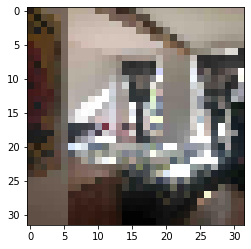

Predicted Result: 56
palm_tree


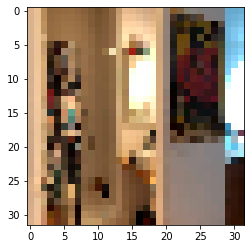

Predicted Result: 56
palm_tree


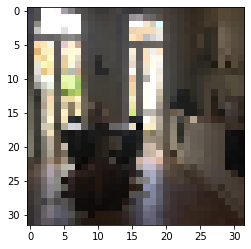

Predicted Result: 28
cup


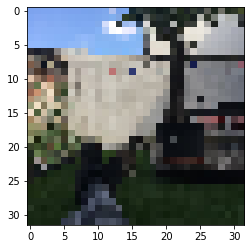

Predicted Result: 54
orchid


In [31]:
import cv2

for x in dictio['18986082']:
  image = cv2.resize(x,(32,32))
  img = np.expand_dims(image,axis=0)
  prediction = model.predict(img)[0]

  plt.imshow((img[0]).astype(np.uint8))
  plt.show()


  print("Predicted Result:", np.argmax(prediction))
  print(metaData['fine_label_names'][np.argmax(prediction)])

# Room recognition

In the cell below we installed monk to use their pretrained model in order to recognise the type of rooms of our listings images

ref:https://github.com/Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/4_image_classification_zoo/Classifier%20-%20House%20room%20type%20Claasification.ipynb

In [32]:
!pip install -U monk-colab


     |████████████████████████████████| 515 kB 5.3 MB/s 
     |████████████████████████████████| 1.3 MB 46.9 MB/s 
     |████████████████████████████████| 358.1 MB 2.7 kB/s 
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=fe9029e325883de9f76c423da3a87c49bfeb1d05e9fcdbc58218feebe221580e
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built GPUtil
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [33]:
from monk.gluon_prototype import prototype


Download the trained weights in order to use monk correctly

In [34]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=10SrowcOJp8GWqEB21BfCIinqUCHS7PMv' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=10SrowcOJp8GWqEB21BfCIinqUCHS7PMv" -O cls_house_scene_trained.zip && rm -rf /tmp/cookies.txt


--2021-12-24 09:11:35--  https://docs.google.com/uc?export=download&id=10SrowcOJp8GWqEB21BfCIinqUCHS7PMv
Resolving docs.google.com (docs.google.com)... 173.194.216.101, 173.194.216.138, 173.194.216.113, ...
Connecting to docs.google.com (docs.google.com)|173.194.216.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [ <=>                ]   3.21K  --.-KB/s    in 0s      

2021-12-24 09:11:35 (47.5 MB/s) - written to stdout [3287]

--2021-12-24 09:11:35--  https://docs.google.com/uc?export=download&confirm=l4J_&id=10SrowcOJp8GWqEB21BfCIinqUCHS7PMv
Resolving docs.google.com (docs.google.com)... 173.194.216.113, 173.194.216.138, 173.194.216.100, ...
Connecting to docs.google.com (docs.google.com)|173.194.216.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-58-docs.googleusercontent.com/docs/securesc/prttvie0ioemv6cchnflcchmngf8nfhc/3h

In [35]:
! unzip -qq cls_house_scene_trained.zip


In [36]:
ls workspace/Task


gluon_resnet18_v1/                   gluon-resnet18_v2/
gluon_resnet18_v1_train_all_layers/  gluon-resnet34_v1/


Load project in inference mode

In [37]:
gtf = prototype(verbose=1);
gtf.Prototype("Task", "gluon_resnet18_v1_train_all_layers", eval_infer=True);

Mxnet Version: 1.9.0

Model Details
    Loading model - workspace/Task/gluon_resnet18_v1_train_all_layers/output/models/final-symbol.json
    Model loaded!

Experiment Details
    Project: Task
    Experiment: gluon_resnet18_v1_train_all_layers
    Dir: /home/ubuntu/workspace/Task/gluon_resnet18_v1_train_all_layers/



In [73]:
for x in dictio:
  print(x)

18986082
22324768
17883395
42138387
879417
25853812
13289354
44555298
45873844
7683600
35143599
10325779
31527090
216715
21201872
5224982
6517280
48620344
45144672
15306836
42834673
32037950
17415373
45522415
43184479
45075291
39299235
27915686
12749066
30390976
44208761
1368957
41579709
39909772
21222837
8685709
46751397
24069818
48314931
43535570
440798
7556348
34935126
46250489
30454162
35410696
743981
35940441
27894287
21487839
23730534
38261373
16952327
22047333
33507433
14721207
36873204
10312116
4645775
24272178
4595143
31509691
10093174
19667164
37896338
51036302
24399863
36992778
3416308
44442191
24726518
8734636
24845257
11407725
47918373
2031176
15654068
18370024
950284
11543219
38779697
47556474
26195752
6695016
47728709
48468158
41210475
40979581
29330456
19927493
35264564
37078301
33983921
18761830
45108222
26648638
41279609
46100001
43235666
44989475
9038976
42138495
35780860
26566901
40463672
6845309
36655362
17415762
15402420
33880221
49753013
19551628
37363780
3751384

Prediction
    Image name:         ProjectML/images/41358154/0.jpg
    Predicted class:      living_room
    Predicted score:      0.4936163127422333



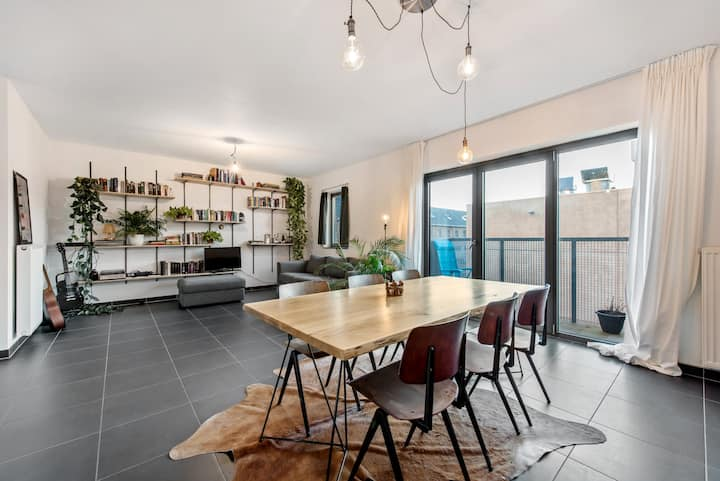

Prediction
    Image name:         ProjectML/images/41358154/1.jpg
    Predicted class:      dining_room
    Predicted score:      0.6049955487251282



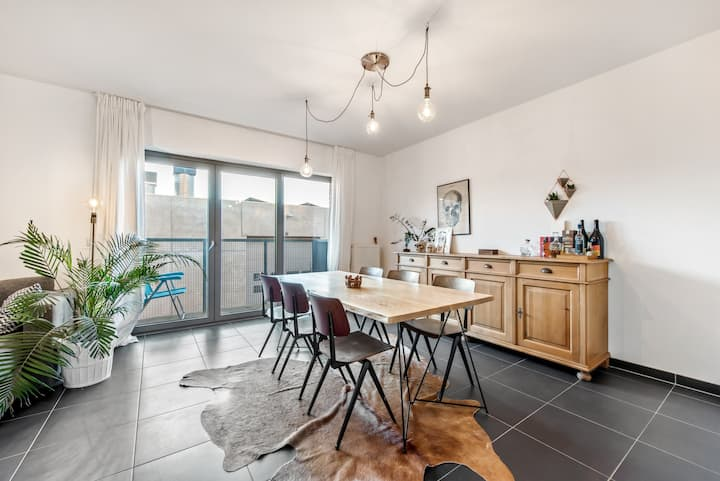

Prediction
    Image name:         ProjectML/images/41358154/2.jpg
    Predicted class:      kitchen
    Predicted score:      0.9611413478851318



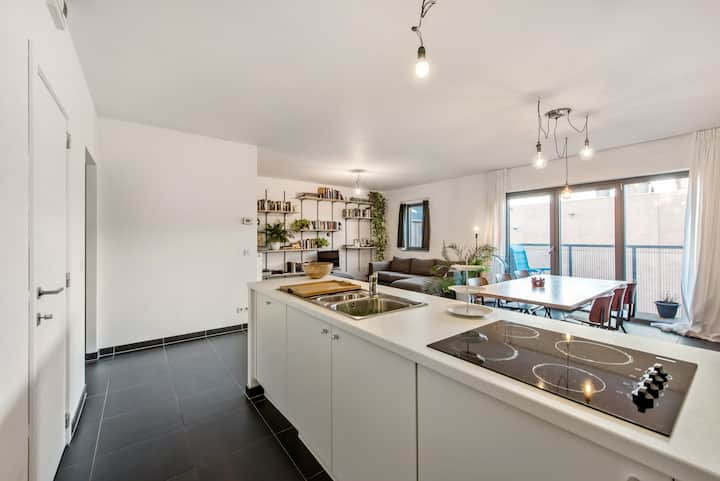

Prediction
    Image name:         ProjectML/images/41358154/3.jpg
    Predicted class:      bathroom
    Predicted score:      0.9999752044677734



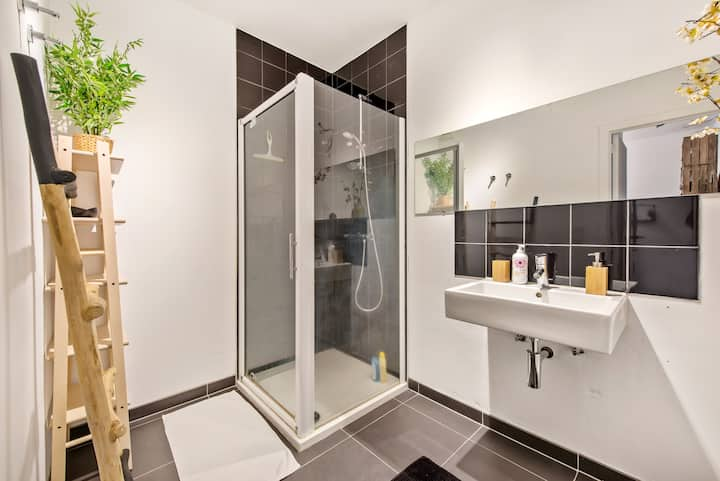

Prediction
    Image name:         ProjectML/images/41358154/4.jpg
    Predicted class:      bedroom
    Predicted score:      0.9995442032814026



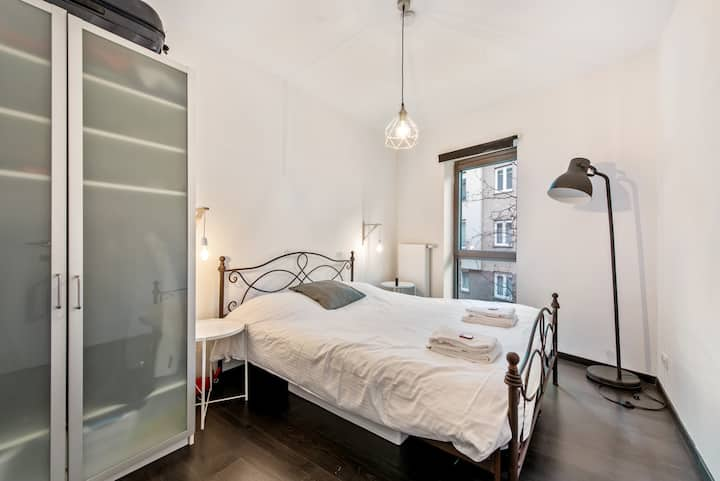

Prediction
    Image name:         ProjectML/images/41358154/5.jpg
    Predicted class:      bedroom
    Predicted score:      0.9991973638534546



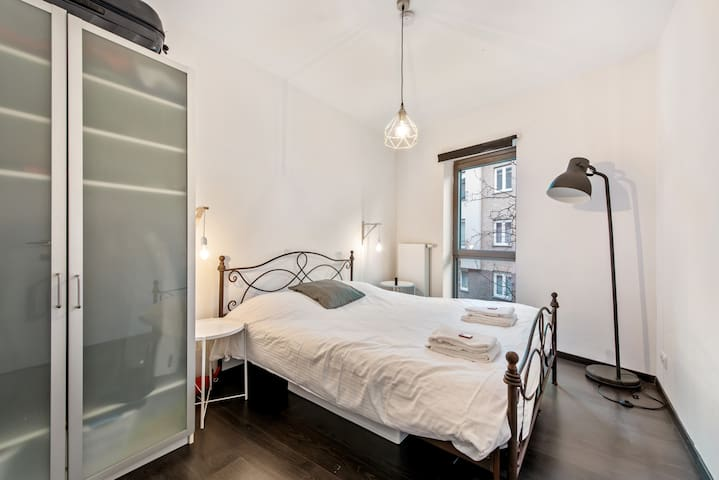

Prediction
    Image name:         ProjectML/images/41358154/6.jpg
    Predicted class:      bedroom
    Predicted score:      0.9987029433250427



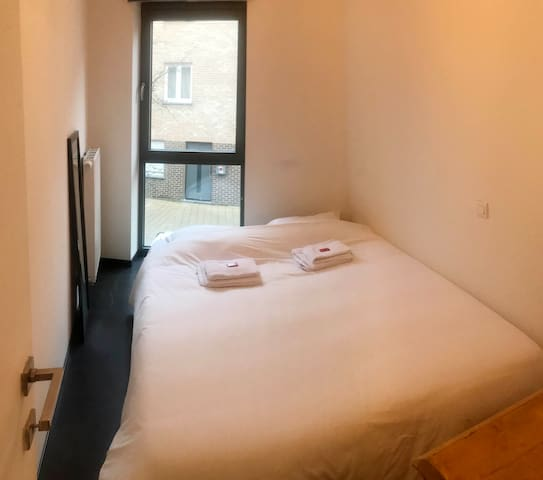

Prediction
    Image name:         ProjectML/images/41358154/7.jpg
    Predicted class:      Exterior
    Predicted score:      0.9971544146537781



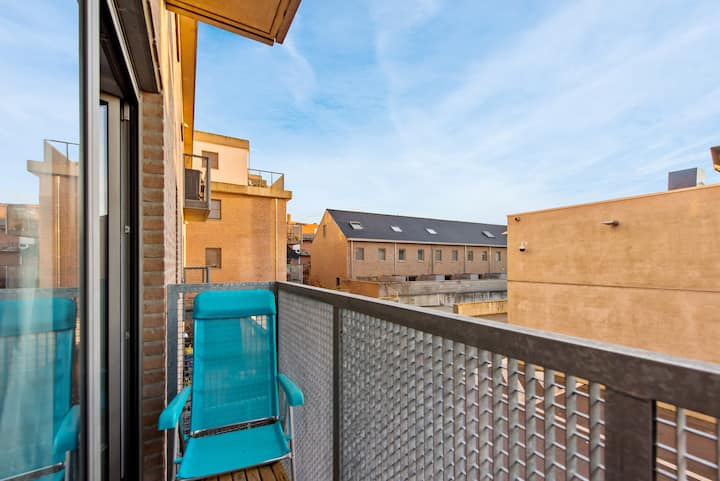

Prediction
    Image name:         ProjectML/images/41358154/8.jpg
    Predicted class:      living_room
    Predicted score:      0.9826697111129761



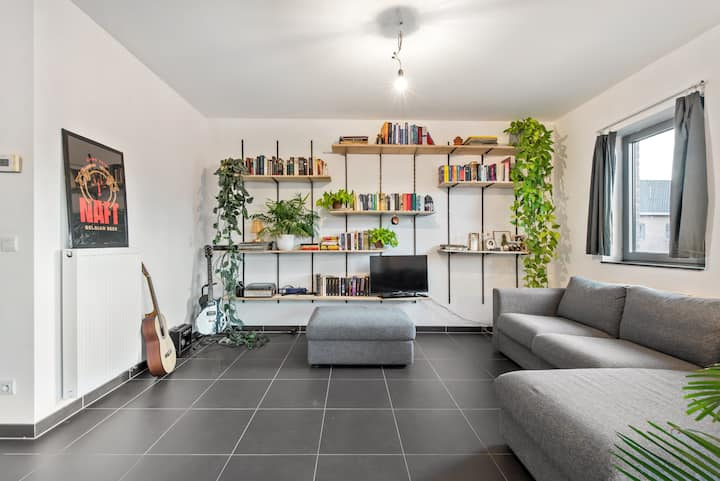

Prediction
    Image name:         ProjectML/images/41358154/9.jpg
    Predicted class:      living_room
    Predicted score:      0.9773871898651123



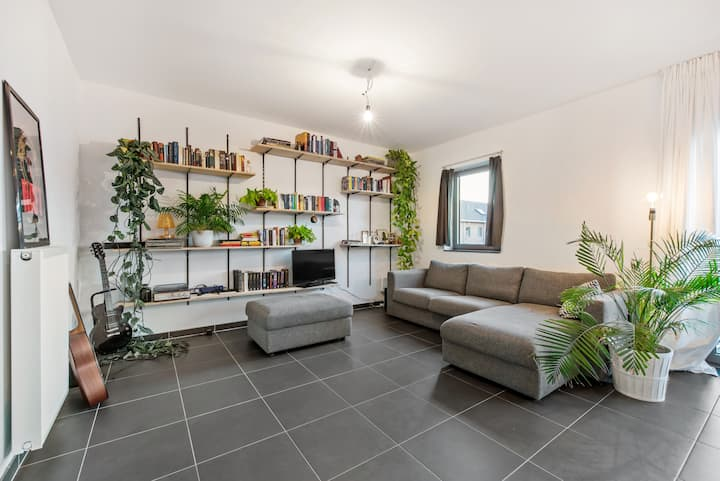

Prediction
    Image name:         ProjectML/images/41358154/10.jpg
    Predicted class:      kitchen
    Predicted score:      0.5631425380706787



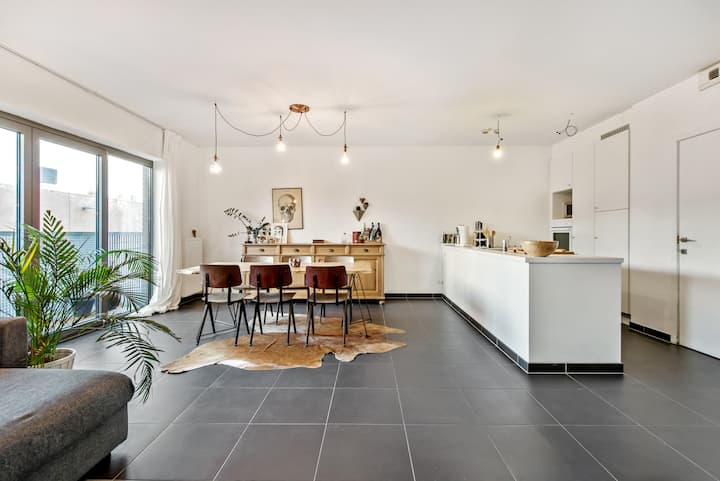

Prediction
    Image name:         ProjectML/images/41358154/11.jpg
    Predicted class:      kitchen
    Predicted score:      0.8107144236564636



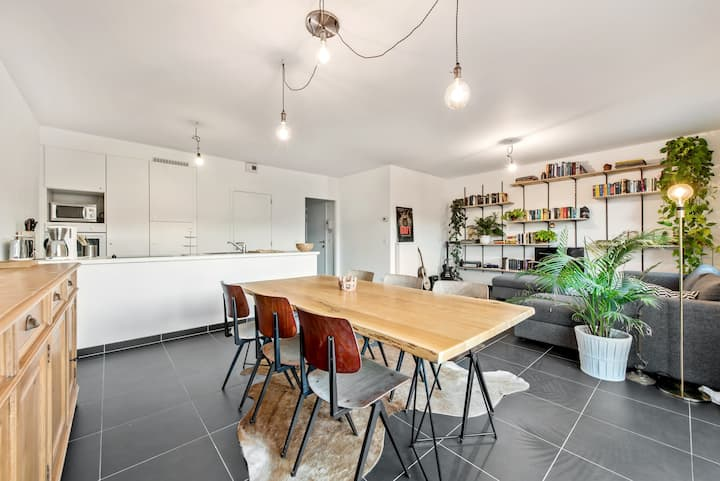

In [74]:
from IPython.display import Image
listing = "41358154"
for picture in range(len(dictio[listing])):
  img_name = 'ProjectML/images/'+listing+'/'+str(picture)+'.jpg'

  predictions = gtf.Infer(img_name=img_name);
  display(Image(filename=img_name, height=300, width=300))

# object segmentation

We used a library from pixellib to use object segmentation. which uses PointRend for performing more accurate segmentation of objects in images.

ref: https://github.com/ayoolaolafenwa/PixelLib 

In [50]:
! pip install pycocotools

In [51]:
! pip install pixellib

     |████████████████████████████████| 430 kB 5.2 MB/s 
     |████████████████████████████████| 156 kB 40.7 MB/s 
     |████████████████████████████████| 49 kB 4.1 MB/s 
     |████████████████████████████████| 145 kB 25.1 MB/s 
     |████████████████████████████████| 8.3 MB 46.3 MB/s 
     |████████████████████████████████| 74 kB 2.8 MB/s 
     |████████████████████████████████| 843 kB 36.8 MB/s 
     |████████████████████████████████| 596 kB 4.1 MB/s 
     |████████████████████████████████| 112 kB 46.9 MB/s 
     |████████████████████████████████| 317 kB 18.2 MB/s 
     |████████████████████████████████| 59.9 MB 80 kB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20211023-py3-none-any.whl size=60947 sha256=be74fe6d4e37ab2348746775589a39eec12d702744f426f4c0c264cc34407fde
  Stored in directory: /root/.cache/pip/wheels/16/98/fc/252d62cab6263c719120e06b28f3378af59b52ce7a20e81852
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl si

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


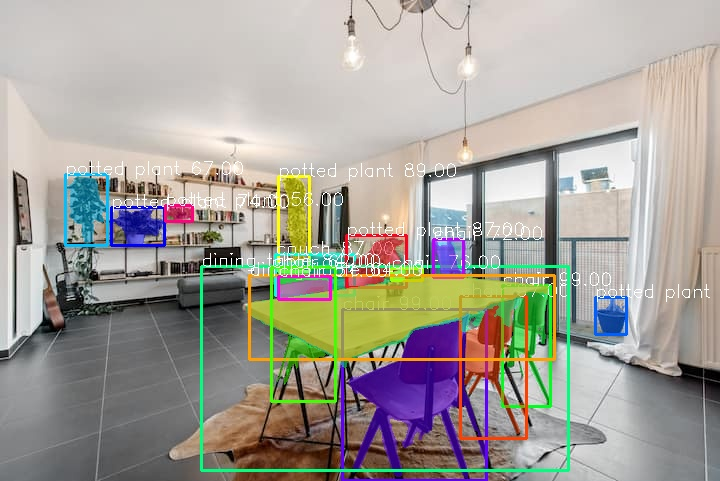

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


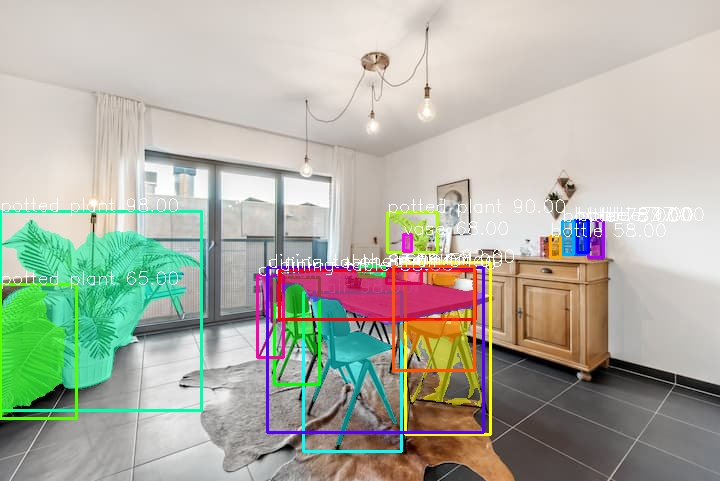

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


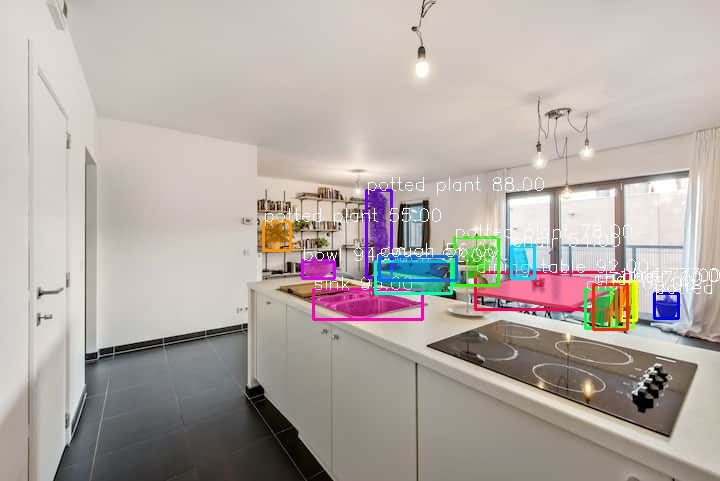

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


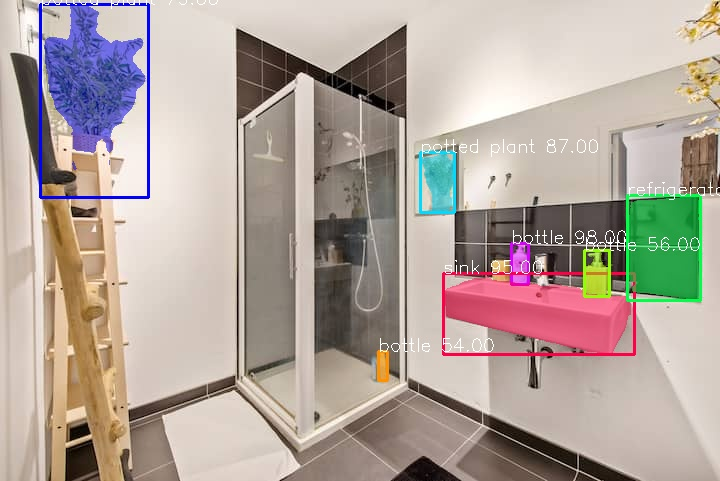

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


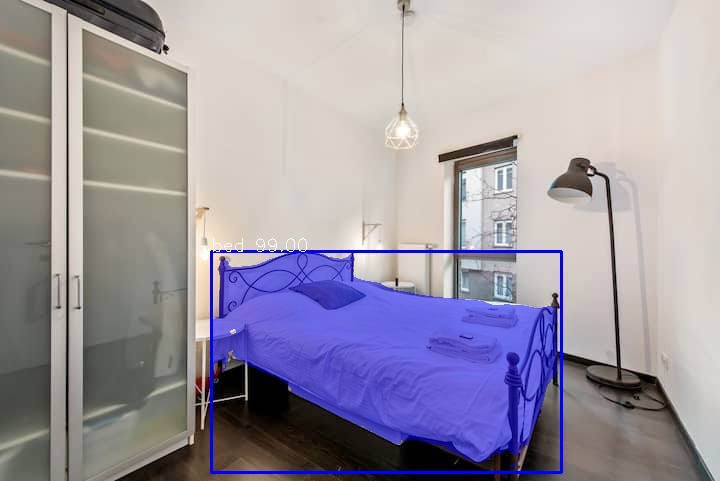

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


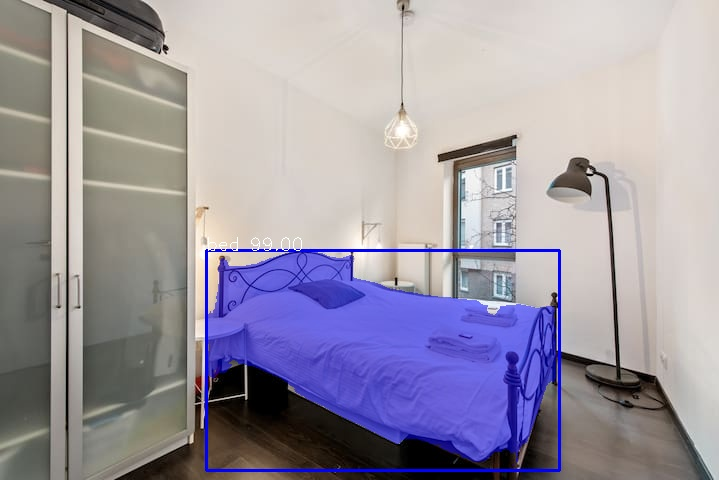

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


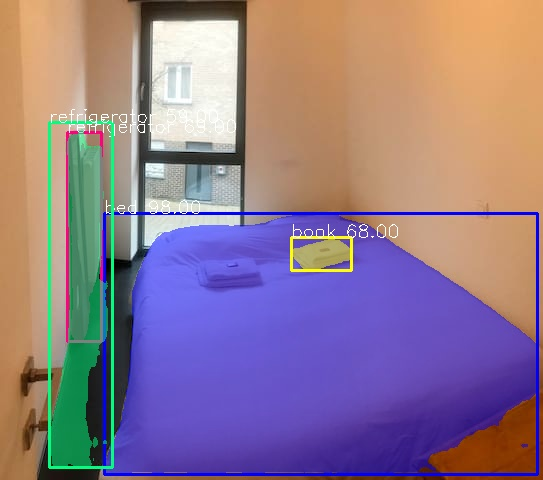

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


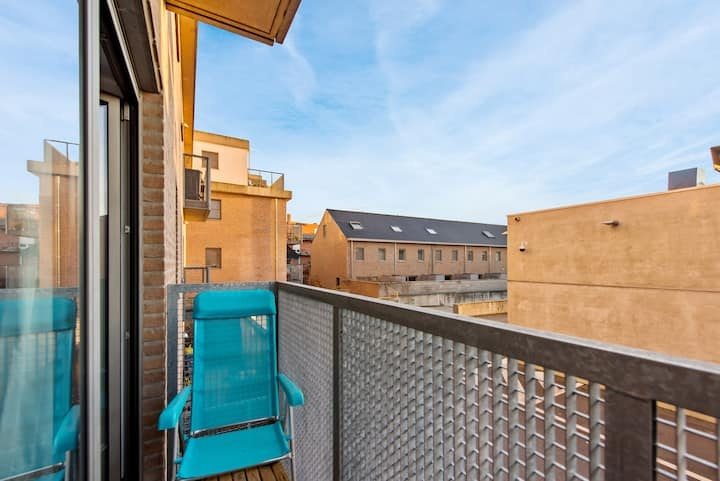

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


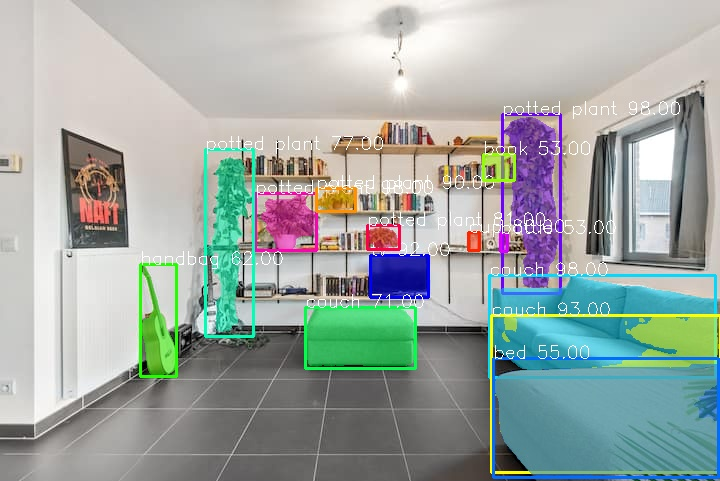

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


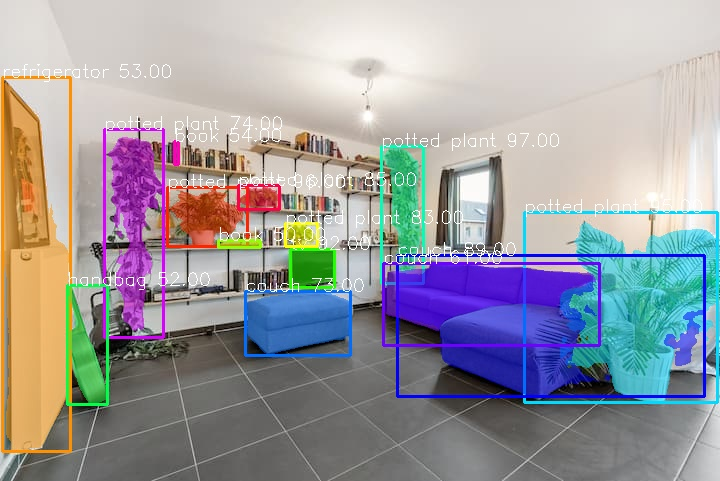

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


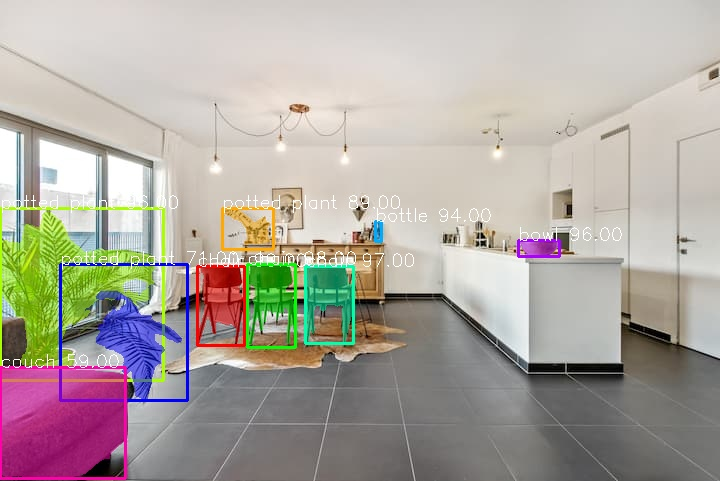

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


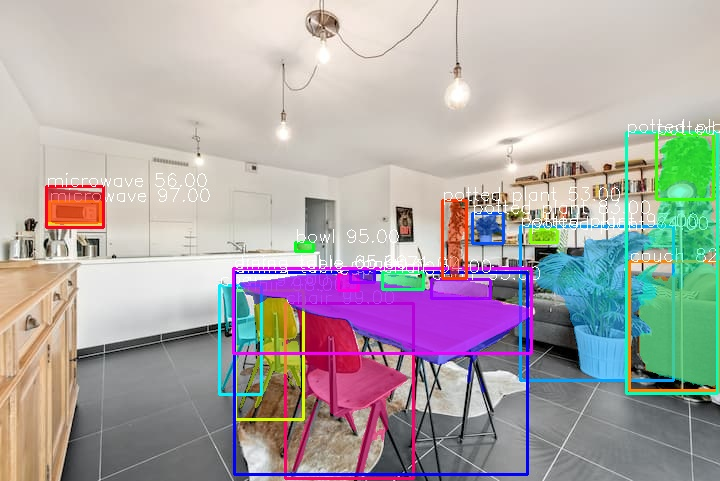

In [75]:
import pixellib
from pixellib.torchbackend.instance import instanceSegmentation

listing = "41358154"
for picture in range(len(dictio[listing])):
  img_name = 'ProjectML/images/'+listing+'/'+str(picture)+'.jpg'
  ins = instanceSegmentation()
  ins.load_model("pointrend_resnet50.pkl")
  ins.segmentImage(img_name, show_bboxes=True, output_image_name="output_image.jpg")
  display(Image(filename="output_image.jpg", height=300, width=300))



We used the object segmentation model to automatically detect the amenities available in a certain listing based on the images.

Which simplifies the work of the listings' owner.

In [78]:
amenities = {}
listing = "41358154"


amenities[listing] = set()
for picture in range(len(dictio[listing])):
  img_name = 'ProjectML/images/' + listing + '/'+str(picture)+'.jpg'
  ins = instanceSegmentation()
  ins.load_model("pointrend_resnet50.pkl")
  info = ins.segmentImage(img_name, show_bboxes=True, output_image_name="output_image.jpg")
  #ik wil dat even zien
  #display(Image(filename="output_image.jpg", height=300, width=300))
  ams = info[0]['class_names']
  scores = info[0]['scores'].numpy()
  for j in range(len(ams)):
    if scores[j] < 70:
      break
    amenities[listing].add(ams[j])
  




The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
The checkpoint state_dict c

In [79]:
amenities

{'41358154': {'bed',
  'bottle',
  'bowl',
  'chair',
  'couch',
  'cup',
  'dining table',
  'microwave',
  'potted plant',
  'refrigerator',
  'sink',
  'tv'}}

# Image clustering

We found help with clustering images that can be found on  https://towardsdatascience.com/how-to-cluster-images-based-on-visual-similarity-cd6e7209fe34

We will cluster images based on Kmeans speciffically designed for images.

In the cell below we wrote a model that extracts the features of an image.

1. loads the image in a 224 x 224 array
2. converts from PIL.Image.Image to numpy array
3. reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels
4. prepare image for model
5. get the feature vector


In [104]:
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    img = load_img(file, target_size=(224,224))
    img = np.array(img) 
    reshaped_img = img.reshape(1,224,224,3) 
    imgx = preprocess_input(reshaped_img)
    features = model.predict(imgx, use_multiprocessing=True)
    return features

Load all images without keeping the listings. We only load in 50 images in the example because this takes around 5 minutes.

In [105]:

images = {}
rootdir = 'ProjectML/images'

counter=0

for subdir, dirs, files in os.walk(rootdir):
  for file in files:
    feat = extract_features(os.path.join(subdir, file),model)
    images[os.path.join(subdir, file)] = feat
  counter = counter+1
  if counter > 50: 
    break


In the cell below we make a list of all the filenames and a list of just the features.

In [106]:
filenames = np.array(list(images.keys()))
feat = np.array(list(images.values()))

In [107]:
feat = feat.reshape(-1,4096)

reduce the amount of dimensions in the feature vector

In [108]:
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

cluster feature vectors
We chose 7, looking at the elbow method in a cell below this looked like a right choice for the k-number for Kmeans clustering.

In [109]:
kmeans = KMeans(n_clusters=7,n_init=1, random_state=22)
kmeans.fit(x)

KMeans(n_clusters=7, n_init=1, random_state=22)

We created a dictionary groups which holds the cluster id and the images { id: [images] }

In [110]:
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

Function to help view the cluster based on the identifier. The function only allows 30 images to be shown at a time.

In [111]:
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    files = groups[cluster]
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:30]
    plt.title('the cluster of group '+str(cluster))
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')
    plt.title('the cluster of group '+str(cluster))

Plotting to see if we chose the right K for Kmeans clustering.

In [112]:
sse = []
list_k = list(range(3, 50))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22)
    km.fit(x)
    
    sse.append(km.inertia_)


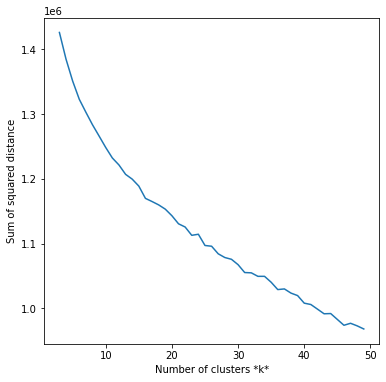

In [113]:
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

Viewing the cluster.

Clipping cluster size from 48 to 30


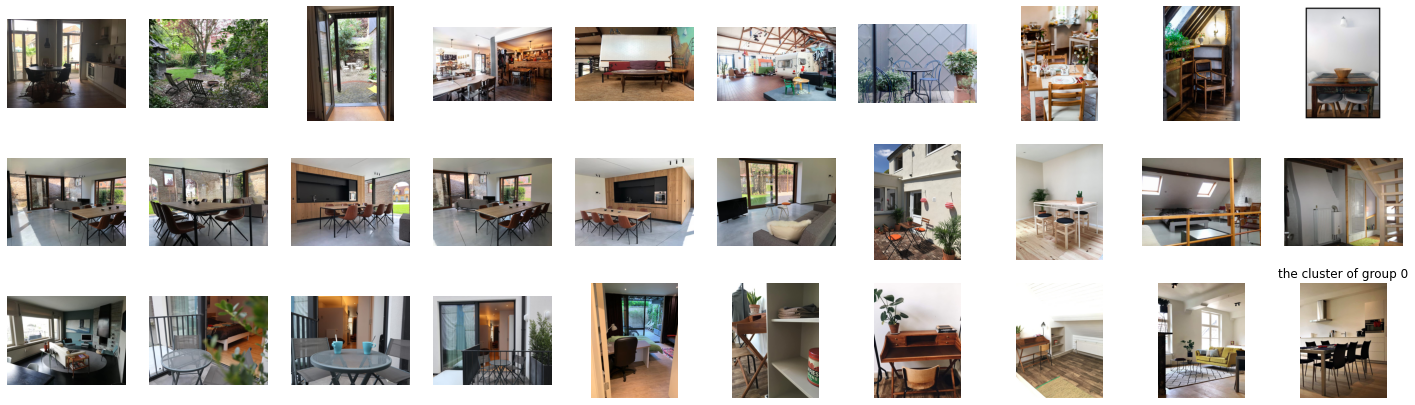

In [114]:
view_cluster(0)

Clipping cluster size from 149 to 30


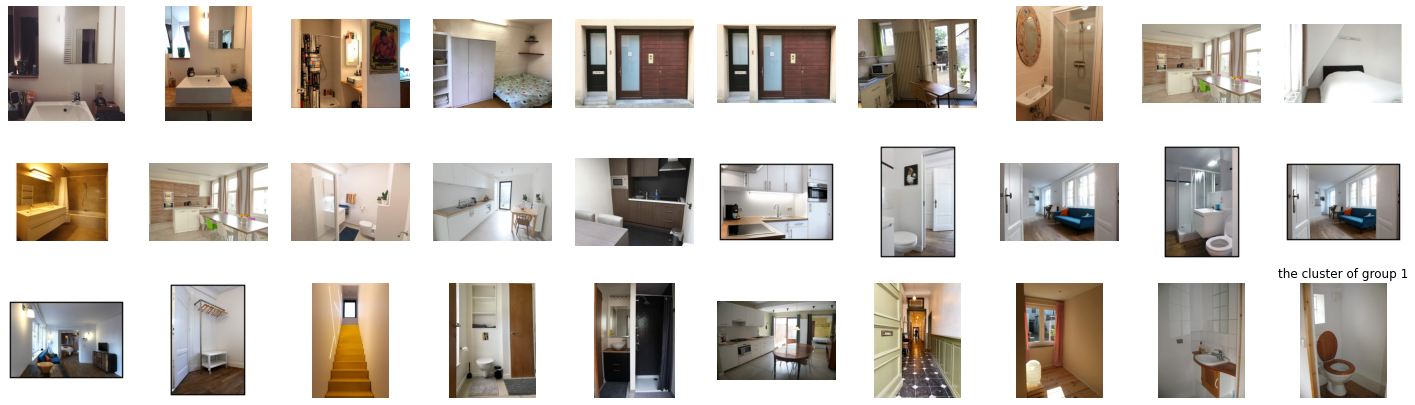

In [115]:
view_cluster(1)

Clipping cluster size from 66 to 30


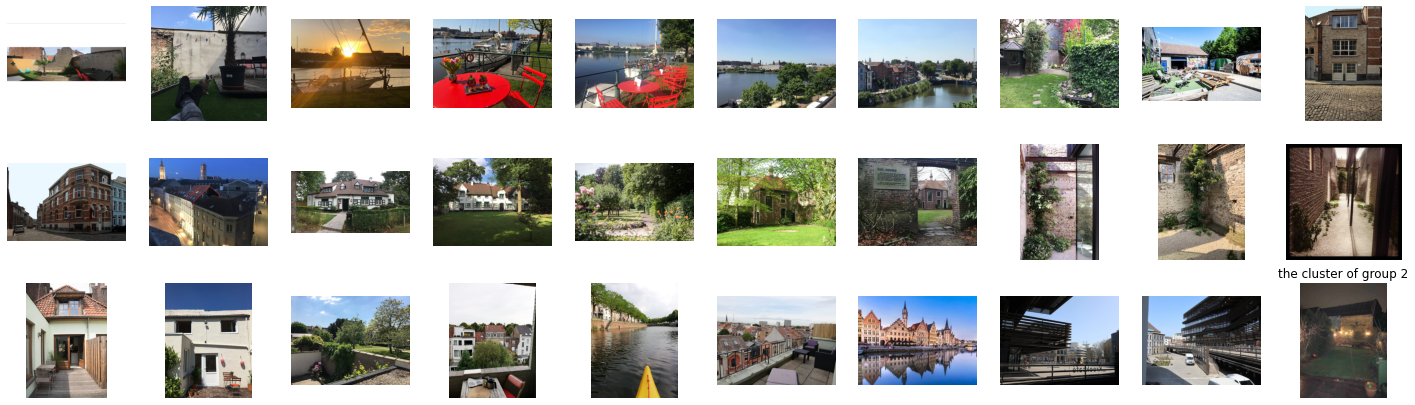

In [116]:
view_cluster(2)

Clipping cluster size from 122 to 30


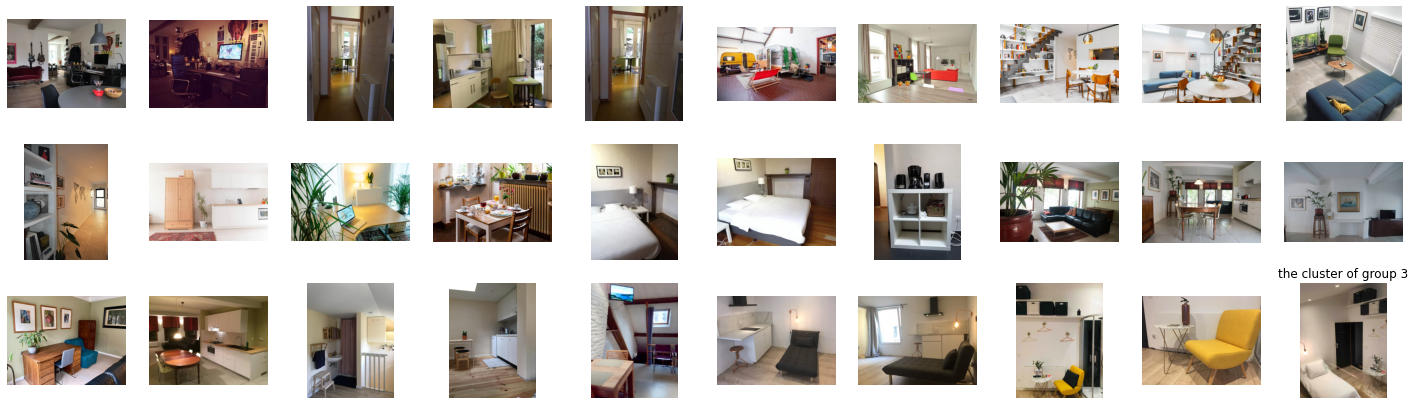

In [117]:
view_cluster(3)

Clipping cluster size from 94 to 30


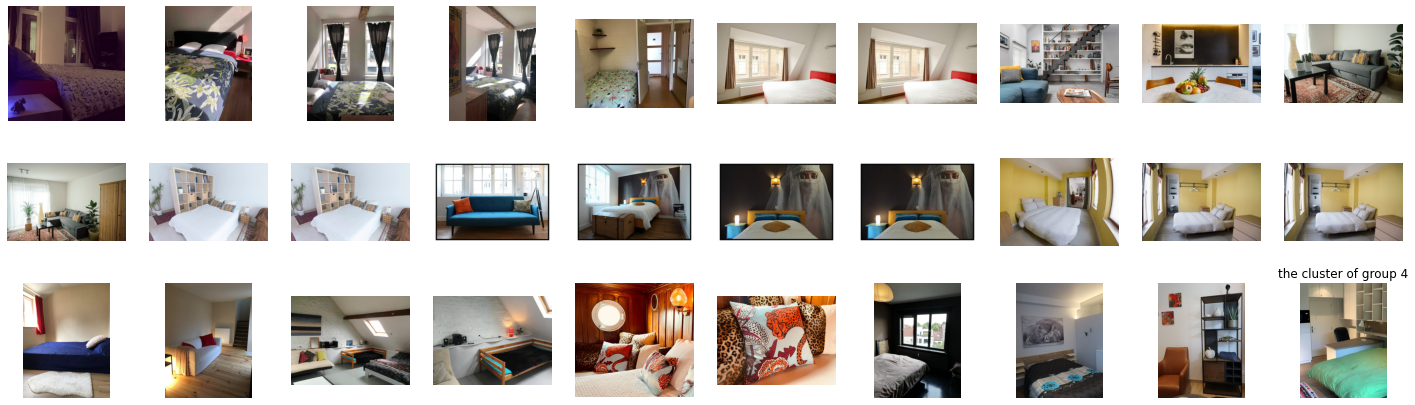

In [118]:
view_cluster(4)

Clipping cluster size from 47 to 30


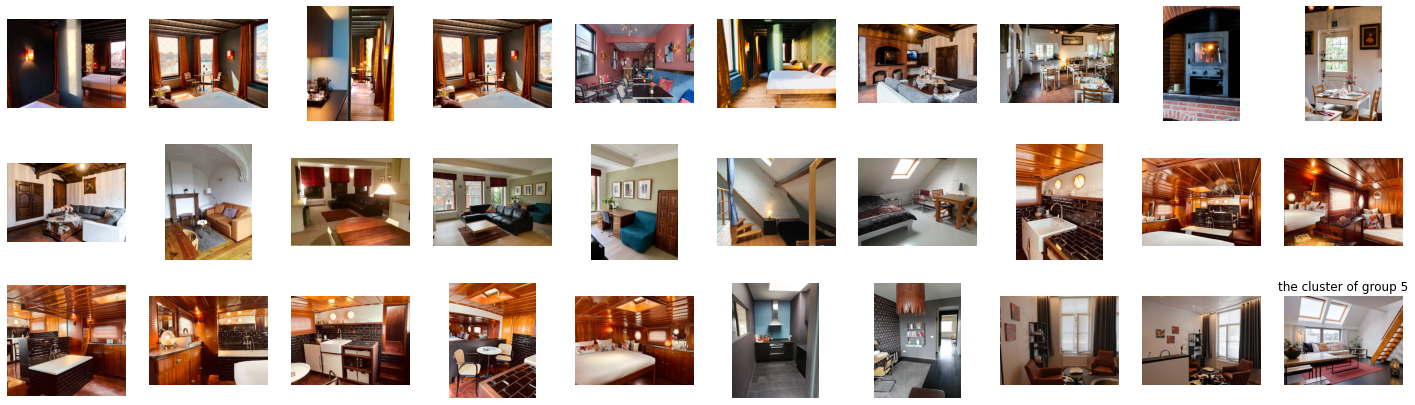

In [119]:
view_cluster(5)

Clipping cluster size from 93 to 30


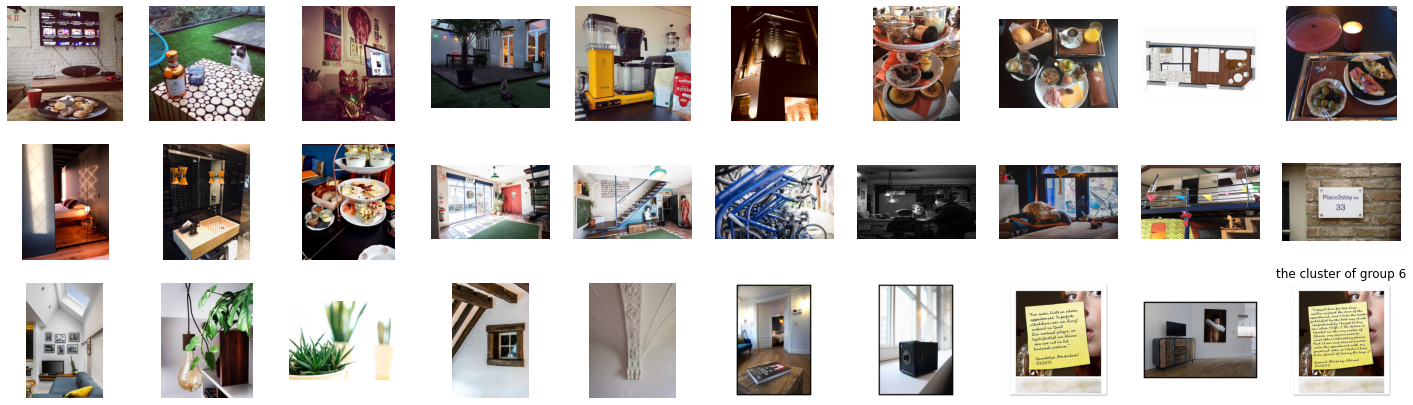

In [120]:
view_cluster(6)

Similar listings will be in the same groups. We also note that within a group cluster there are images of the same type of rooms.

# comparing Images

Multiple listings will reside within the same clusters. In order to find out if two listings are of the same place we will look within a certain cluster and compare images.

We used an image-comparing library from sewar where we got the inspiration from 

ref: https://towardsdatascience.com/measuring-similarity-in-two-images-using-python-b72233eb53c6

the documentation for sewar can be found

ref: https://sewar.readthedocs.io/en/latest/_modules/sewar/full_ref.html#mse

In [99]:
!pip install sewar

  Created wheel for sewar: filename=sewar-0.4.4-py3-none-any.whl size=10390 sha256=5fadef0eeb5997a1cd96764b7bd855cb8ac7d84dfe9ffd229eb85cb3e10a539b
  Stored in directory: /root/.cache/pip/wheels/b5/00/df/f1ba40d0d44c95b0db52804e518c128d5631866b91ea1960ba
Successfully built sewar


In [100]:
from sewar.full_ref import msssim

We wrote a function to find duplicates within a certain cluster

In [121]:
def find_duplicates(x):
  similarity = 0
  score = ""

  for i in range(len(groups[x])):
    for j in range(i+1, len(groups[x])):
      listing1 = groups[x][i].split("/")
      listing2=groups[x][j].split("/")
      if listing1[2] != listing2[2]:
        im1 = media.read_image(groups[x][i])
        im2 = media.read_image(groups[x][j])
        im1 = media.resize_image(im1,(400, 400))
        im2 = media.resize_image(im2,(400, 400))

        comparison = msssim(im1,im2)
        if comparison>similarity:
          similarity=comparison
          score = str(comparison)+groups[x][i]+"\n"+groups[x][j]
          image1 = groups[x][i]
          image2 = groups[x][j]
          IM1 = im1
          IM2 = im2

  print(image1+" and "+image2+" are most similar with value: "+str(similarity))
  media.show_image(IM1)
  media.show_image(IM2)





ProjectML/images/7683600/7.jpg and ProjectML/images/15306836/2.jpg are most similar with value: (0.3438721775716048+0j)



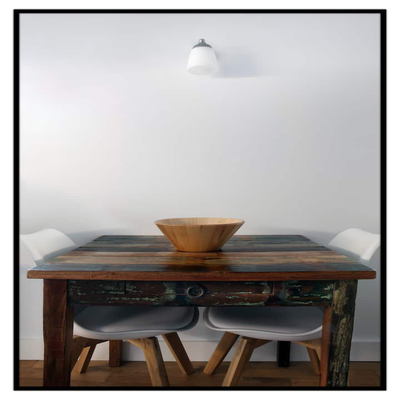


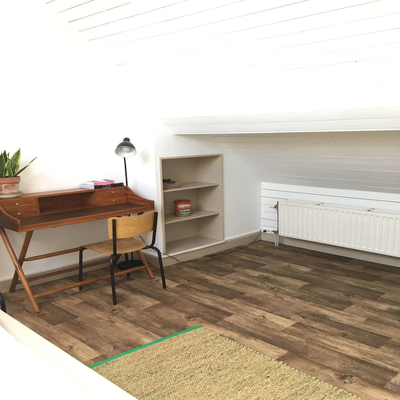

In [122]:
find_duplicates(0)

ProjectML/images/40531077/3.jpg en ProjectML/images/17411938/12.jpg lijken het hardst op elkaar met waarde (0.456038861478852+0j)



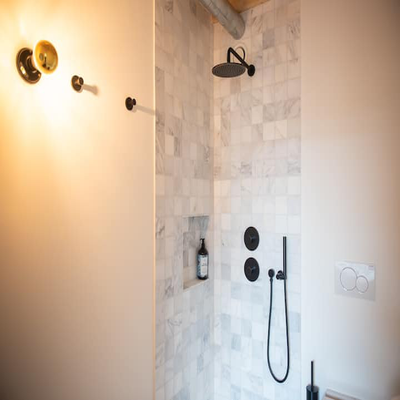


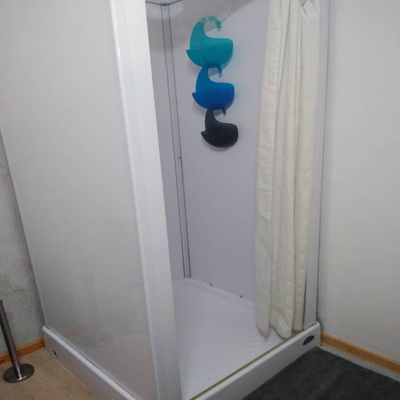

In [ ]:
find_duplicates(2)

ProjectML/images/40531077/4.jpg en ProjectML/images/47209900/3.jpeg lijken het hardst op elkaar met waarde (0.4390592770575447+0j)



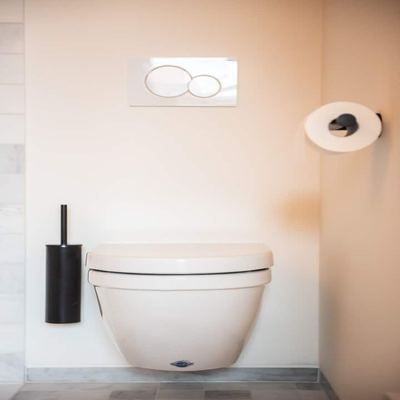


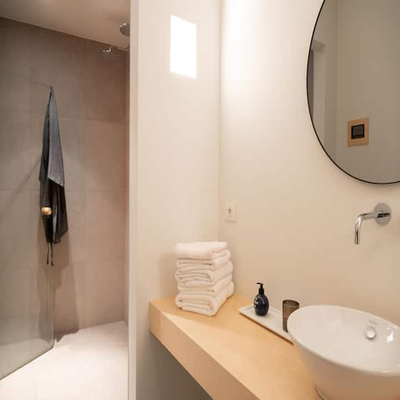

In [ ]:
find_duplicates(3)